In [8]:
import pickle 
import torch 
import numpy
from utilities import overlap_top_tr, overlap_bulk_tr
import matplotlib.pyplot as plt

Here I reproduce figure (2) from Gur-Ari et al. "GRADIENT DESCENT HAPPENS IN A TINY SUBSPACE" paper.

There top spaces calculated using the following script: 
```
python train.py --task projected_training \--epochs 1 \
--hidden_sizes 200 200 200 --activation 'tanh' \
--warm_up_epochs 0 \
--algo SGD \
--plot_losses \
--lr 0.01 \
--loss MSE \
--seed 42 --save_evecs \
--batch_size 100 \
--dataset MNIST_full      
```

In [35]:

path = "../storage/projected_training_20241215_213017_MNIST_full_projected_training_MLP_tanh_SGD_hidden_sizes_200-200-200_hid_sizes_200-200-200.pkl"

with open(path, "rb") as file:
    results = pickle.load(file)

print(results['top_evecs'])

[(100, 'training', tensor([[ 9.1511e-10,  1.9986e-12, -2.1367e-09,  ..., -1.3250e-01,
          1.1551e-01,  7.7480e-02],
        [-8.0481e-10, -1.7627e-12,  1.8787e-09,  ...,  1.5645e-02,
         -1.8142e-01,  7.4255e-02],
        [-5.1539e-10, -1.1253e-12,  1.1998e-09,  ...,  1.6583e-02,
         -1.4979e-01,  2.6225e-02],
        ...,
        [ 1.3969e-09,  3.0536e-12, -3.2600e-09,  ...,  2.0867e-01,
         -1.1278e-01, -1.1160e-01],
        [ 2.4770e-09,  5.4093e-12, -5.7739e-09,  ...,  2.8841e-02,
         -5.2732e-02, -7.3922e-02],
        [ 1.1329e-09,  2.4751e-12, -2.6422e-09,  ...,  1.5522e-01,
          3.1734e-02, -1.4662e-01]])), (200, 'training', tensor([[ 1.2184e-09,  1.1961e-09,  2.9982e-09,  ...,  1.4036e-01,
         -1.2829e-01, -7.0541e-02],
        [ 1.3632e-09,  1.3361e-09,  3.3564e-09,  ..., -1.0893e-02,
          1.6998e-01, -8.6305e-02],
        [-3.4968e-10, -3.4310e-10, -8.6613e-10,  ..., -1.8159e-02,
          1.5926e-01, -2.4453e-02],
        ...,
       

t1 = 100
t1 = 200
t1 = 300
t1 = 400


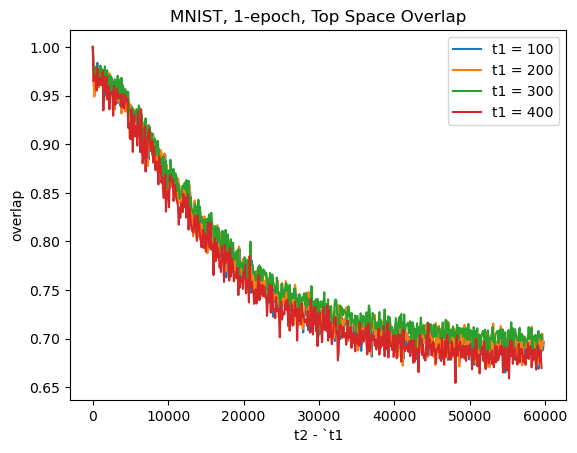

In [38]:
t1s = [100, 200, 300, 400]

for t1 in t1s:
    print(f't1 = {t1}')
    overlaps = []
    top_evecs1 = next(evecs for step, phase, evecs in results['top_evecs'] if step == t1)

    for (step, phase, evecs) in results['top_evecs'][:-1]:
        if step < t1:
            continue
        overlaps.append((step - t1, float(overlap_top_tr(top_evecs1, evecs))))
    delta_t, overlaps = list(zip(*overlaps))    
    plt.plot(delta_t, overlaps, label = f"t1 = {t1}")

plt.legend()
plt.xlabel("t2 - `t1")
plt.ylabel("overlap")
plt.title("MNIST, 1-epoch, Top Space Overlap")
plt.show()

t1 = 100
t1 = 200
t1 = 300
t1 = 400


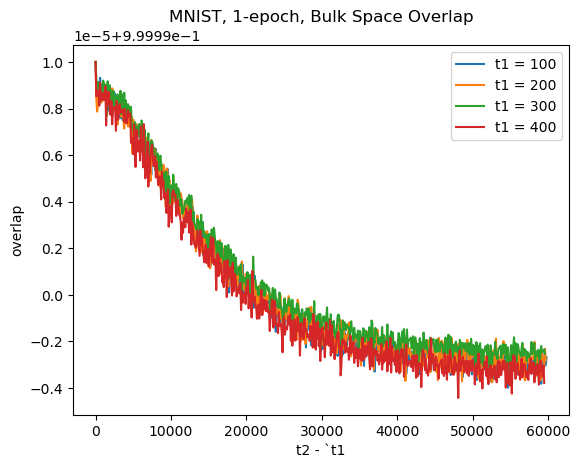

In [45]:
t1s = [100, 200, 300, 400]

for t1 in t1s:
    print(f't1 = {t1}')
    overlaps = []
    top_evecs1 = next(evecs for step, phase, evecs in results['top_evecs'] if step == t1)

    for (step, phase, evecs) in results['top_evecs'][:-1]:
        if step < t1:
            continue
        overlaps.append((step - t1, float(overlap_bulk_tr(top_evecs1, evecs))))
    delta_t, overlaps = list(zip(*overlaps))    
    # overlaps = [round(x, 2) for x in overlaps]
    plt.plot(delta_t, overlaps, label = f"t1 = {t1}")

plt.legend()
plt.xlabel("t2 - `t1")
plt.ylabel("overlap")
# plt.axhline(y = 0, xmin = 0., xmax = 60000.)
plt.title("MNIST, 1-epoch, Bulk Space Overlap")
plt.show()